ANSWER 1

In [5]:
from google.colab import files
import pandas as pd
import os

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

  # Optional: If the uploaded file is a CSV, read it into a pandas DataFrame
  if fn.endswith('.csv'):
    try:
      df = pd.read_csv(fn)
      print(f"\nSuccessfully read '{fn}' into a pandas DataFrame:")
      display(df.head())
    except Exception as e:
      print(f"\nError reading file {fn}: {e}")

TypeError: 'NoneType' object is not subscriptable

In [16]:
df

,Height,Weight,Age,Grip_strength,Frailty,Height_m,Weight_kg,BMI,Frailty_binary,AgeGroup_30–45,AgeGroup_46–60,AgeGroup_<30
0,65.8,112,30,30,N,1.67132,50.802345,18.19,0,True,False,False
1,71.5,136,19,31,N,1.81610,61.688562,18.70,0,False,False,True
2,69.4,153,45,29,N,1.76276,69.399633,22.33,0,True,False,False
3,68.2,142,22,28,Y,1.73228,64.410117,21.46,1,False,False,True
4,67.8,144,29,24,Y,1.72212,65.317301,22.02,1,False,False,True
5,68.7,123,50,26,N,1.74498,55.791862,18.32,0,False,True,False
6,69.8,141,51,22,Y,1.77292,63.956524,20.35,1,False,True,False
7,70.1,136,23,20,Y,1.78054,61.688562,19.46,1,False,False,True
8,67.9,112,17,19,N,1.72466,50.802345,17.08,0,False,False,True
9,66.8,120,39,31,N,1.69672,54.431084,18.91,0,True,False,False


In [17]:
import pandas as pd
import numpy as np

df['Frailty_binary'] = df['Frailty'].replace({'Y': 1, 'N': 0})
df['Frailty_binary'] = df['Frailty_binary'].astype(np.int8)
display(df)
print(df.dtypes)

/tmp/ipython-input-819721849.py:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Frailty_binary'] = df['Frailty'].replace({'Y': 1, 'N': 0})


,Height,Weight,Age,Grip_strength,Frailty,Height_m,Weight_kg,BMI,Frailty_binary,AgeGroup_30–45,AgeGroup_46–60,AgeGroup_<30
0,65.8,112,30,30,N,1.67132,50.802345,18.19,0,True,False,False
1,71.5,136,19,31,N,1.81610,61.688562,18.70,0,False,False,True
2,69.4,153,45,29,N,1.76276,69.399633,22.33,0,True,False,False
3,68.2,142,22,28,Y,1.73228,64.410117,21.46,1,False,False,True
4,67.8,144,29,24,Y,1.72212,65.317301,22.02,1,False,False,True
5,68.7,123,50,26,N,1.74498,55.791862,18.32,0,False,True,False
6,69.8,141,51,22,Y,1.77292,63.956524,20.35,1,False,True,False
7,70.1,136,23,20,Y,1.78054,61.688562,19.46,1,False,False,True
8,67.9,112,17,19,N,1.72466,50.802345,17.08,0,False,False,True
9,66.8,120,39,31,N,1.69672,54.431084,18.91,0,True,False,False


Height            float64
Weight              int64
Age                 int64
Grip_strength       int64
Frailty            object
Height_m          float64
Weight_kg         float64
BMI               float64
Frailty_binary       int8
AgeGroup_30–45       bool
AgeGroup_46–60       bool
AgeGroup_<30         bool
dtype: object


In [15]:
import pandas as pd

# Raw data
data = {
    "Height": [65.8, 71.5, 69.4, 68.2, 67.8, 68.7, 69.8, 70.1, 67.9, 66.8],
    "Weight": [112, 136, 153, 142, 144, 123, 141, 136, 112, 120],
    "Age": [30, 19, 45, 22, 29, 50, 51, 23, 17, 39],
    "Grip_strength": [30, 31, 29, 28, 24, 26, 22, 20, 19, 31],
    "Frailty": ['N', 'N', 'N', 'Y', 'Y', 'N', 'Y', 'Y', 'N', 'N']
}

# Save to CSV
df_raw = pd.DataFrame(data)
df_raw.to_csv("frailty_data.csv", index=False)

# Read from CSV
df = pd.read_csv("frailty_data.csv")



df["Height_m"] = df["Height"] * 0.0254
df["Weight_kg"] = df["Weight"] * 0.45359237


df["BMI"] = (df["Weight_kg"] / (df["Height_m"] ** 2)).round(2)

def age_group(age):
    if age < 30:
        return "<30"
    elif 30 <= age <= 45:
        return "30–45"
    elif 46 <= age <= 60:
        return "46–60"
    else:
        return ">60"

df["AgeGroup"] = df["Age"].apply(age_group)

df["Frailty_binary"] = df["Frailty"].map({"Y": 1, "N": 0}).astype("int8")

# One-hot encoding AgeGroup
df = pd.get_dummies(df, columns=["AgeGroup"])
display(df)




,Height,Weight,Age,Grip_strength,Frailty,Height_m,Weight_kg,BMI,Frailty_binary,AgeGroup_30–45,AgeGroup_46–60,AgeGroup_<30
0,65.8,112,30,30,N,1.67132,50.802345,18.19,0,True,False,False
1,71.5,136,19,31,N,1.81610,61.688562,18.70,0,False,False,True
2,69.4,153,45,29,N,1.76276,69.399633,22.33,0,True,False,False
3,68.2,142,22,28,Y,1.73228,64.410117,21.46,1,False,False,True
4,67.8,144,29,24,Y,1.72212,65.317301,22.02,1,False,False,True
5,68.7,123,50,26,N,1.74498,55.791862,18.32,0,False,True,False
6,69.8,141,51,22,Y,1.77292,63.956524,20.35,1,False,True,False
7,70.1,136,23,20,Y,1.78054,61.688562,19.46,1,False,False,True
8,67.9,112,17,19,N,1.72466,50.802345,17.08,0,False,False,True
9,66.8,120,39,31,N,1.69672,54.431084,18.91,0,True,False,False


In [14]:
import os

# Select numeric columns
numeric_cols = df.select_dtypes(include='number')

# Compute summary statistics
summary = pd.DataFrame({
    "Mean": numeric_cols.mean(),
    "Median": numeric_cols.median(),
    "StdDev": numeric_cols.std()
}).round(2)

summary

,Mean,Median,StdDev
math score,66.09,66.0,15.16
reading score,69.17,70.0,14.60
writing score,68.05,69.0,15.20


In [ ]:
correlation = df['Grip_strength'].corr(df['Frailty_binary'])
print(f"Correlation between Grip Strength and Frailty (binary): {correlation:.2f}")

In conclusion, the correlation of -0.48 between Frailty and Grip Strength tells us that they are inversely proportional and have a weak correlation with one another. This means that the grip strength and the frailty do not significantly affect one another.

ANSWER 2

<Figure size 800x600 with 0 Axes>

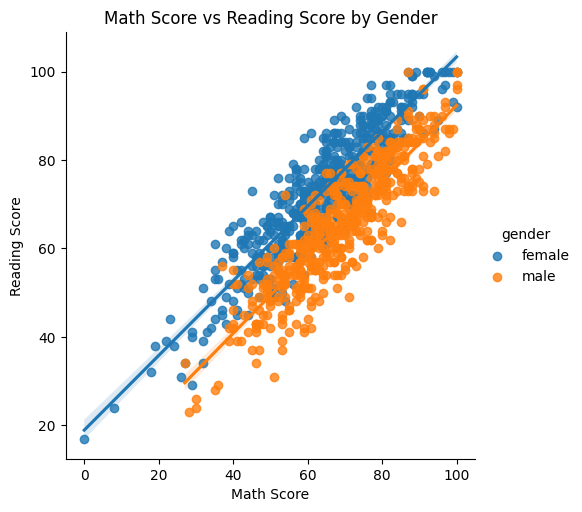

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a scatter plot of 'math score' vs 'reading score'
plt.figure(figsize=(8, 6))
sns.lmplot(data=df, x='math score', y='reading score', hue='gender')
plt.title('Math Score vs Reading Score by Gender')
plt.xlabel('Math Score')
plt.ylabel('Reading Score')
plt.show()

According to the graph, there is a different in reading and math scores with respect to the gender group. As shown on the line of best fit, males score higher in math courses and females score higher in reading courses. In conclusion, there are significant gender differences in math vs reading scores.

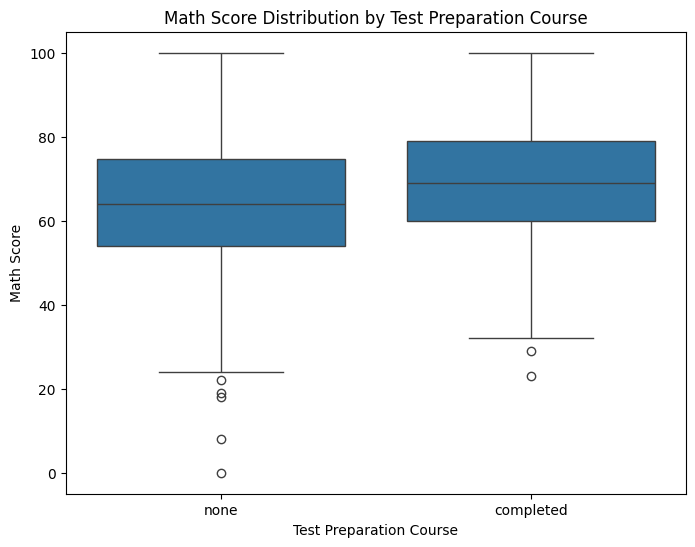

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a box plot of 'math score' by 'test preparation course'
plt.figure(figsize=(8, 6))
sns.boxplot(data=df, x='test preparation course', y='math score')
plt.title('Math Score Distribution by Test Preparation Course')
plt.xlabel('Test Preparation Course')
plt.ylabel('Math Score')
plt.show()

According to the graph, students score higher in math courses with test preparation than those who do not. The mean of the math scores with the test preparation course is higher than those with no test preparation course.

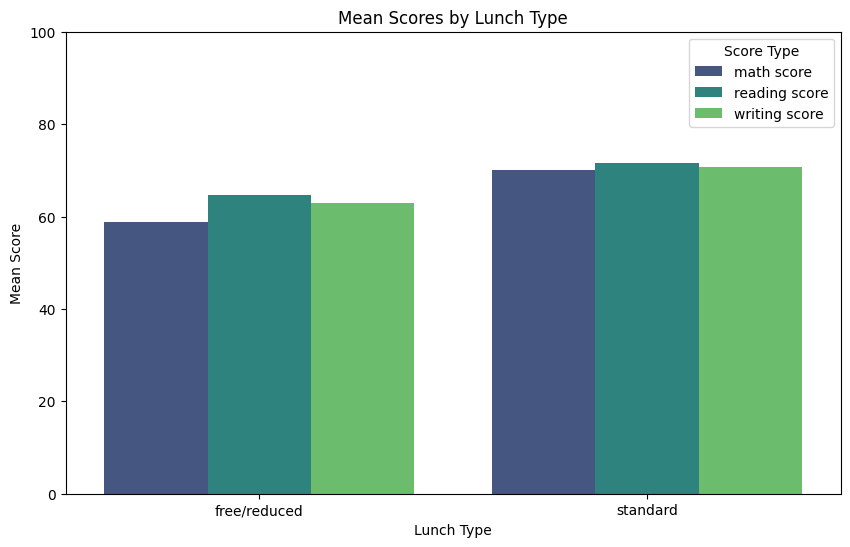

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Group by 'lunch' and calculate the mean of the score columns
mean_scores_by_lunch = df.groupby('lunch')[['math score', 'reading score', 'writing score']].mean().reset_index()

# Melt the DataFrame to long format for easier plotting with seaborn
mean_scores_melted = mean_scores_by_lunch.melt(id_vars='lunch', var_name='score_type', value_name='mean_score')

# Create the grouped bar chart
plt.figure(figsize=(10, 6))
sns.barplot(data=mean_scores_melted, x='lunch', y='mean_score', hue='score_type', palette='viridis')
plt.title('Mean Scores by Lunch Type')
plt.xlabel('Lunch Type')
plt.ylabel('Mean Score')
plt.ylim(0, 100) # Assuming scores are between 0 and 100
plt.legend(title='Score Type')
plt.show()

According to the group graph, students have significantly higher mean scores when having standard lunch than those who have free/reduced lunch.

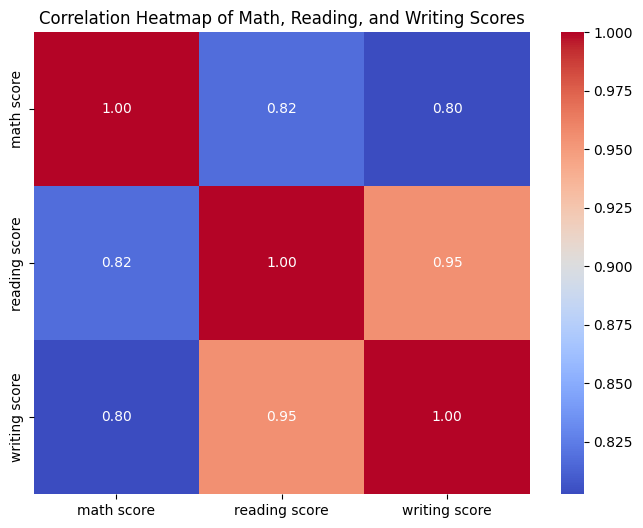

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select the score columns
score_cols = ['math score', 'reading score', 'writing score']
score_df = df[score_cols]

# Calculate the correlation matrix
correlation_matrix = score_df.corr()

# Create the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap of Math, Reading, and Writing Scores')
plt.show()

According to the plot, writing and reading scores have a much stronger correlation than math and reading scores, with an increase of 0.13.

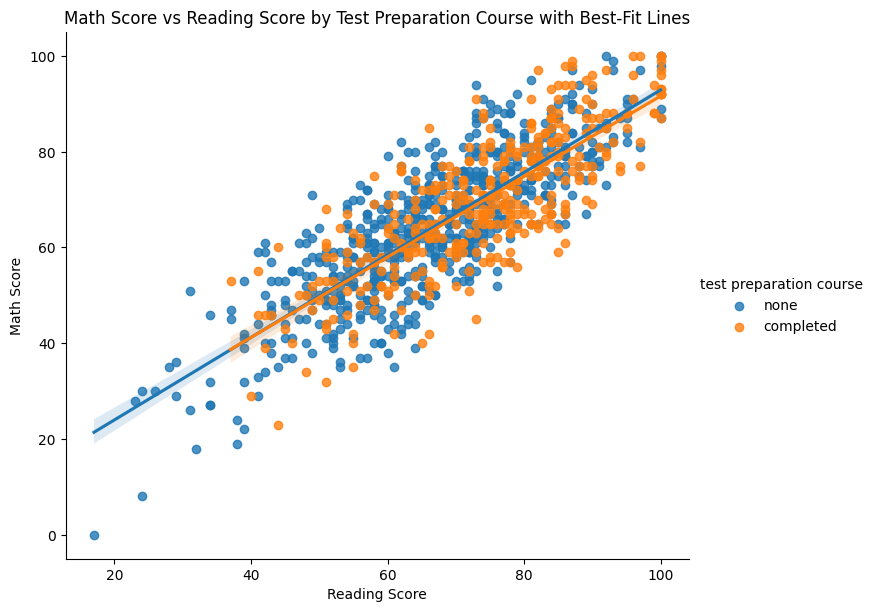

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a scatter plot with best-fit lines for each test preparation course group
sns.lmplot(data=df, x='reading score', y='math score', hue='test preparation course', height=6, aspect=1.2)
plt.title('Math Score vs Reading Score by Test Preparation Course with Best-Fit Lines')
plt.xlabel('Reading Score')
plt.ylabel('Math Score')
plt.show()

According to the plot, the result of the math and reading scores have slightly different correlation with the reading scores having a higher score with test preparation than those with no test preparation as shown by the slopes. Conversely, students score higher in math without test preparation than students with test preparation.